In [1]:
import pandas as pd
from bitarray import frozenbitarray

In [2]:
import numpy as np
!pip install git+https://github.com/EgorDudyrev/paspailleur.git

  Cloning https://github.com/EgorDudyrev/paspailleur.git to /private/var/folders/28/jmw8nj2d5p9crv64k2tq98400000gn/T/pip-req-build-4sszvfiu
  Running command git clone --filter=blob:none --quiet https://github.com/EgorDudyrev/paspailleur.git /private/var/folders/28/jmw8nj2d5p9crv64k2tq98400000gn/T/pip-req-build-4sszvfiu
  Resolved https://github.com/EgorDudyrev/paspailleur.git to commit bad718a7d0396217fc5552a9152d14c5dc99581e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
from importlib import reload

In [4]:
from script import clustering as clib

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paspailleur/pattern_structures/abstract_ps.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
from sklearn import datasets

n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
X, y = noisy_circles

In [6]:
from paspailleur import pattern_structures as PS
linscale = np.linspace(-1.5, 1.5, 11)
ps = PS.CartesianPS([PS.IntervalPS(values=linscale), PS.IntervalPS(values=linscale)])

In [7]:
clib = reload(clib)

In [8]:
min_support = 0.05
max_support = 0.8
min_delta_stability = 0.01

In [9]:
data = list(ps.preprocess_data(X))
attributes, attr_extents = zip(*ps.iter_attributes(data, min_support=min_support))
print(len(attributes))

34


In [10]:
import caspailleur as csp

In [11]:
%%time
stable_extents = csp.mine_equivalence_classes.list_stable_extents_via_gsofia(
    attr_extents,
    n_objects=len(data), min_delta_stability=min_delta_stability, min_supp=min_support,
    use_tqdm=True, n_attributes=len(attributes)
)

  0%|          | 0/34 [00:00<?, ?it/s]

CPU times: user 17.5 ms, sys: 7.6 ms, total: 25.1 ms
Wall time: 25 ms


In [12]:
%%time
concepts_df = pd.DataFrame(clib.mine_clusters_info(stable_extents, attr_extents, ps, data, min_support, max_support, None, True))
concepts_df.head()

Compute intents:   0%|          | 0/793 [00:00<?, ?it/s]

CPU times: user 342 ms, sys: 8.43 ms, total: 350 ms
Wall time: 349 ms


,extent,intent,delta_stability,support,frequency,intent_human
0,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","((-1.2, 0.9, (BoundStatus.RCLOSED, BoundStatus...",35,400,0.800,"x0: [-1.20, 0.90], x1: [-0.90, 0.90]"
1,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","((-0.9, 0.9, (BoundStatus.RCLOSED, BoundStatus...",35,400,0.800,"x0: [-0.90, 0.90], x1: [-0.90, 1.20]"
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-0.9, 1.2, (BoundStatus.RCLOSED, BoundStatus...",34,399,0.798,"x0: [-0.90, 1.20], x1: [-0.90, 0.90]"
3,"[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-1.2, 1.2, (BoundStatus.RCLOSED, BoundStatus...",34,397,0.794,"x0: [-1.20, 1.20], x1: [-0.90, 0.60]"
4,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","((-0.9, 0.9, (BoundStatus.RCLOSED, BoundStatus...",31,396,0.792,"x0: [-0.90, 0.90], x1: [-1.20, 0.90]"


/var/folders/28/jmw8nj2d5p9crv64k2tq98400000gn/T/ipykernel_14816/2566774148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concepts_df['delta_stability'])


<Axes: xlabel='delta_stability', ylabel='Density'>

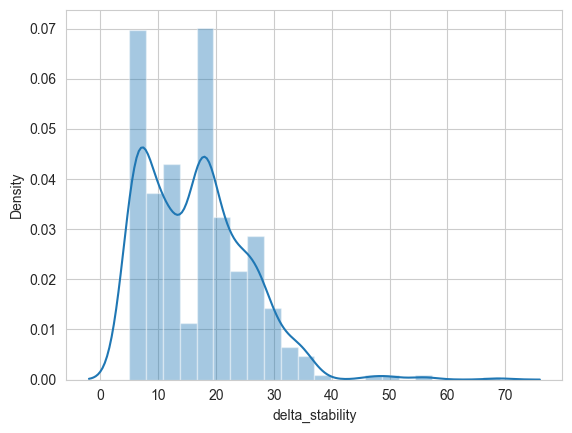

In [13]:
import seaborn as sns
sns.distplot(concepts_df['delta_stability'])

In [14]:
concepts_df.head()

,extent,intent,delta_stability,support,frequency,intent_human
0,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","((-1.2, 0.9, (BoundStatus.RCLOSED, BoundStatus...",35,400,0.800,"x0: [-1.20, 0.90], x1: [-0.90, 0.90]"
1,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","((-0.9, 0.9, (BoundStatus.RCLOSED, BoundStatus...",35,400,0.800,"x0: [-0.90, 0.90], x1: [-0.90, 1.20]"
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-0.9, 1.2, (BoundStatus.RCLOSED, BoundStatus...",34,399,0.798,"x0: [-0.90, 1.20], x1: [-0.90, 0.90]"
3,"[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","((-1.2, 1.2, (BoundStatus.RCLOSED, BoundStatus...",34,397,0.794,"x0: [-1.20, 1.20], x1: [-0.90, 0.60]"
4,"[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","((-0.9, 0.9, (BoundStatus.RCLOSED, BoundStatus...",31,396,0.792,"x0: [-0.90, 0.90], x1: [-1.20, 0.90]"


In [15]:
clib = reload(clib)

In [16]:
best_clustering, best_log, top_log = clib.clusterise_v1(concepts_df, overlap_weight=0.5, n_concepts_weight=0.0, complexity_weight=0.01, thrift_factor=1, n_clusters_min=2)
print(best_clustering)
print(best_log)
top_log

[0, 757, 760, 774]
                   total_cover  overlap  n_concepts  reward
Added concept idx                                          
ø                        0.000      0.0           0   0.000
0                        0.800      0.0           1   0.800
757                      0.870      0.0           2   0.870
760                      0.938      0.0           3   0.938
774                      0.994      0.0           4   0.994


,total_cover,overlap,n_concepts,reward
clustering,,,,
"(0, 757, 760, 774)",0.994,0.0,4,0.994


In [17]:
from script import visual_lib as vlib
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

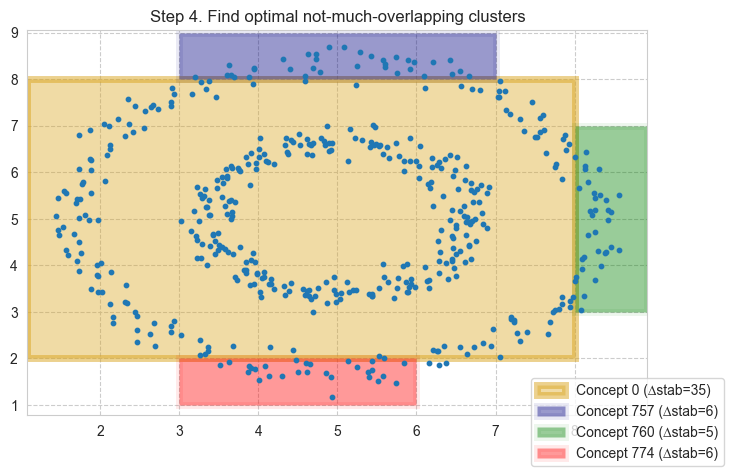

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

k = 10
vlib.init_axis(ax, f"Step 4. Find optimal not-much-overlapping clusters", linscale, linscale, range(len(linscale)), range(len(linscale)), grid_params=dict(zorder=0, linestyle='--'))

ax.scatter(X[:,0], X[:,1], zorder=2, s=10)

cluster_colors = ['goldenrod', 'navy', 'green', 'red', 'purple']
for concept_idx, clr in zip(best_clustering, cluster_colors):
    d_stab = concepts_df.at[concept_idx, 'delta_stability']/concepts_df['delta_stability'].max()
    intent = concepts_df.at[concept_idx, 'intent']
    vlib.draw_2d_description(
        ax, intent,
        patch_params=dict(
            fc=to_rgba(clr, 0.4), ec=to_rgba(clr, 1*d_stab), linewidth=5, zorder=1,
            label=f'Concept {concept_idx} (∆stab={concepts_df.at[concept_idx, "delta_stability"]})'
        )
    )

fig.legend(loc='lower right')
fig.savefig('../figures/pipe_step4_circlesdata.pdf')
plt.show()